In [1]:
import os

zoom_size = 17

rb_min = 0

data_dir = "251017_SM-S938N"
band_map = {
    868.85: "n26",
    798.15: "n28", # upper
}

log_dir = os.path.join(data_dir, "logs")
pci_list = [21,22]

In [2]:
import os
import pandas as pd

device_data = {}  

for fname in os.listdir(log_dir):
    if fname.endswith(".xlsx"):
        parts = fname.replace(".xlsx", "").split("_")

        date      = parts[0]
        device    = parts[1]
        test_no   = parts[2]
        # route     = parts[3]

        fpath = os.path.join(log_dir, fname)
        print(fpath)
        
        df = pd.read_excel(fpath)
        
        df["date"]     = date
        df["device"]   = device
        df["test_no"]  = test_no
        # df["route"]    = route
        df["filename"] = fname
        
        if device not in device_data:
            device_data[device] = []
        
        device_data[device].append(df)

for device, df_list in device_data.items():
    merged = pd.concat(df_list, ignore_index=True)
    merged.to_excel(os.path.join(data_dir, f"merged.xlsx"), index=False)
    # display(merged)

251017_SM-S938N/logs/251016_SM-S938N_TEST06_n-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST02_n28-M1_Fav.xlsx
251017_SM-S938N/logs/251017_SM-S938N_TEST02_N26-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST05_n-M1_Fav.xlsx
251017_SM-S938N/logs/251017_SM-S938N_TEST03_N26-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST04_n28-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST01_n26-M1_Fav.xlsx
251017_SM-S938N/logs/251017_SM-S938N_TEST01_N28-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST03_n28-M1_Fav.xlsx
251017_SM-S938N/logs/251017_SM-S938N_TEST04_N26-M1_Fav.xlsx
251017_SM-S938N/logs/251017_SM-S938N_TEST01_N26-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST05_n-M2_Fav.xlsx
251017_SM-S938N/logs/251017_SM-S938N_TEST04_N28-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST03_n26-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST04_n26-M1_Fav.xlsx
251017_SM-S938N/logs/251017_SM-S938N_TEST03_N28-M1_Fav.xlsx
251017_SM-S938N/logs/251016_SM-S938N_TEST06_n-

In [3]:
import matplotlib.pyplot as plt

def analyze_kpi(fname):
    df= pd.read_excel(fname)
    # print(df.info())
    # display(df)

    unique_values = df["5G KPI PCell Chip Type"].dropna().drop_duplicates().tolist()
    if len(unique_values) > 1:
        print(unique_values)
    
    col_map = {
        "TIME_STAMP": "TIME",
        "5G KPI PCell RF Serving PCI": "PCI",
        # "5G KPI PCell RF Band": "Band",
        "5G KPI PCell RF Frequency [MHz]": "Freq",
        "5G KPI PCell RF Serving SS-RSRP [dBm]": "RSRP",
        "5G KPI PCell RF Serving SS-RSRQ [dB]": "RSRQ",
        "5G KPI PCell RF Serving SS-SINR [dB]": "SINR",
        "Qualcomm 5G-NR LL1 Serving Freq Tracking Loop Result PCell FTL SNR_SSB [dB]": "SINR_SSB",     
        "Qualcomm 5G-NR LL1 Serving Freq Tracking Loop Result PCell FTL SNR_TRS [dB]": "SINR_TRS",
        "5G KPI PCell RF RI": "RI",
        "5G KPI PCell RF CQI": "CQI",
        "5G KPI PCell Layer1 DL BLER [%]": "DL_BLER",
        "5G KPI PCell Layer1 UL BLER [%]": "UL_BLER",
        "5G KPI PCell Layer1 DL MCS (Avg)": "DL_MCS",
        "5G KPI PCell Layer1 DL RB Num (Including 0)": "DL_RB",
        "5G KPI PCell Layer1 PDSCH Throughput [Mbps]": "DL_Tput",
        # "5G KPI PCell Layer2 MAC DL Throughput [Mbps]": "MAC DL Throughput",
        "GPS Lon": "Lon",
        "GPS Lat": "Lat",
        "date": "date",
        "test_no": "test_no",
        "device": "device",
        # "route": "route",
        "filename": "filename",
    }
    df = df[list(col_map.keys())].rename(columns=col_map)
    
    df["Band"] = df["Freq"].map(band_map)
    df.drop(columns=["Freq"], inplace=True)

    df['DL_Tput_per_RB'] = df['DL_Tput']/df['DL_RB']
    df['DL_Tput_full_RB'] = df['DL_Tput_per_RB'] * 52

    df["test_no"] = df["date"].astype(str) + "_" + df["test_no"].astype(str).str.replace("TEST","")
    df = df.drop(columns=["date"])
    
    new_order = [
        "TIME",
        "test_no",
        "Lon", "Lat",
        "Band", "PCI", 
        "RSRP", "RSRQ", 
        "SINR",
        "SINR_SSB",
        "SINR_TRS",
        "CQI", "RI", "DL_MCS", 
        "DL_BLER", "UL_BLER",         
        "DL_RB", "DL_Tput",
        "DL_Tput_per_RB",
        "DL_Tput_full_RB",
    ]
    
    df = df[new_order]
    df = df.sort_values(by="TIME", ascending=True)
    df.reset_index(drop=True, inplace=True)
    # print(len(df))
    
    time_counts = df["TIME"].value_counts()
    valid_times = time_counts[time_counts == 2].index
    df = df[df["TIME"].isin(valid_times)]
    # print(len(df))
    
    pci_check = (
        df.groupby("TIME")["PCI"]
          .apply(lambda s: s.isin(pci_list).all())
    )    
    df = df[df["TIME"].isin(pci_check[pci_check].index)]
    df = df.drop(columns=["PCI"])
    # print(len(df))

    rb_check = (
        df.groupby("TIME")["DL_RB"]
          .apply(lambda s: (s >= rb_min).all()) 
    )
    df = df[df["TIME"].isin(rb_check[rb_check].index)]
    # print(len(df))
        
    df = df.dropna()
    # print(len(df))
    
    df.reset_index(drop=True, inplace=True)

    return df

df = analyze_kpi(os.path.join(data_dir, f"merged.xlsx"))
display(df)
print()

,TIME,test_no,Lon,Lat,Band,RSRP,RSRQ,SINR,SINR_SSB,SINR_TRS,CQI,RI,DL_MCS,DL_BLER,UL_BLER,DL_RB,DL_Tput,DL_Tput_per_RB,DL_Tput_full_RB
0,2025-10-16 15:03:51,251016_01,126.98147,37.54727,n26,-71.35,-10.35,40.78,40.78,33.43,15.00,2.0,26.16,4.00,0.00,49.35,109.777,2.224458,115.671814
1,2025-10-16 15:03:51,251016_01,126.98145,37.54729,n28,-74.50,-10.34,39.46,39.46,39.64,13.33,2.0,25.00,7.85,0.00,49.16,104.679,2.129353,110.726363
2,2025-10-16 15:03:52,251016_01,126.98148,37.54729,n26,-70.43,-10.28,40.25,40.25,33.40,15.00,2.0,25.48,8.43,1.52,48.40,106.983,2.210393,114.940413
3,2025-10-16 15:03:52,251016_01,126.98145,37.54729,n28,-69.90,-10.30,42.39,42.39,40.08,13.00,2.0,25.47,6.41,0.00,49.26,107.441,2.181100,113.417215
4,2025-10-16 15:03:53,251016_01,126.98146,37.54730,n28,-70.36,-10.30,41.84,41.84,39.43,13.67,2.0,26.11,5.73,0.00,49.35,110.374,2.236555,116.300871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6590,2025-10-17 10:33:12,251017_04,126.98129,37.54673,n26,-87.12,-10.32,33.21,33.21,32.08,12.00,2.0,20.09,8.55,1.54,49.33,82.829,1.679080,87.312143
6591,2025-10-17 10:33:13,251017_04,126.98124,37.54677,n26,-83.38,-10.28,36.06,36.06,32.77,12.00,2.0,23.89,10.81,0.00,46.84,94.645,2.020602,105.071307
6592,2025-10-17 10:33:13,251017_04,126.98121,37.54677,n28,-82.41,-10.32,36.11,36.11,37.93,11.33,2.0,20.42,9.19,0.00,49.17,84.013,1.708623,88.848403
6593,2025-10-17 10:33:16,251017_04,126.98119,37.54688,n28,-75.43,-10.31,39.62,39.62,38.77,11.67,2.0,20.90,8.83,0.00,49.08,85.524,1.742543,90.612225


In [4]:
import pandas as pd
import os

df = analyze_kpi(os.path.join(data_dir, f"merged.xlsx"))

df["TIME"] = pd.to_datetime(df["TIME"], errors="coerce")    

exclude_cols = ["TIME", "test_no", "Lon", "Lat", "Band"]
kpi_cols = [
    "RSRP", "RSRQ",
    # "SINR", 
    "SINR_SSB", "SINR_TRS",
    "CQI", "DL_MCS", "RI",
    "DL_BLER", "UL_BLER",
    "DL_RB", "DL_Tput",
    # "DL_Tput_per_RB",
    # "DL_Tput_full_RB",
]

df_mean = (
    df.groupby(["test_no", "Band"])[kpi_cols]
      .mean()
      .reset_index()
)

summary = []
for test in df_mean["test_no"].unique():
    df_sub = df_mean[df_mean["test_no"] == test].set_index("Band")[kpi_cols]
    # print(test)
    # display(df_sub)
    row = {"Test No": test}
    for metric in kpi_cols:
        # row[f"{metric}_n26"] = df_sub.loc["n26", metric]
        # row[f"{metric}_n28"] = df_sub.loc["n28", metric]
        row[f"Δ{metric}"] = df_sub.loc["n28", metric] - df_sub.loc["n26", metric]
    summary.append(row)

df_summary = pd.DataFrame(summary).sort_values("Test No")
display(df_summary.round(2))
    
for test in df_mean["test_no"].unique():
    test_df = df[df["test_no"] == test]

    start_time = test_df["TIME"].min().strftime("%H:%M:%S")
    end_time   = test_df["TIME"].max().strftime("%H:%M:%S")
    duration   = test_df["TIME"].max() - test_df["TIME"].min()
    total_seconds = int(duration.total_seconds())
    minutes, seconds = divmod(total_seconds, 60)
    duration_str = f"{minutes}'{seconds}\""

    df_sub = df_mean[df_mean["test_no"] == test].set_index("Band")[kpi_cols].T
    df_sub["Δ(n28-n26)"] = df_sub["n28"] - df_sub["n26"]

    print(f"⸰ Test No  : {test}")
    print(f"⸰ Time     : {start_time} ~ {end_time} ({duration_str})")

    display(df_sub.round(2))
    print()

,Test No,ΔRSRP,ΔRSRQ,ΔSINR_SSB,ΔSINR_TRS,ΔCQI,ΔDL_MCS,ΔRI,ΔDL_BLER,ΔUL_BLER,ΔDL_RB,ΔDL_Tput
0,251016_01,-1.49,0.07,0.20,3.78,-0.17,-0.80,-0.05,0.52,0.32,0.26,-5.99
1,251016_02,-2.44,0.01,-0.69,2.34,-0.27,-1.27,-0.11,0.32,0.68,0.15,-8.39
2,251016_03,-1.81,-0.03,-0.84,2.23,0.21,-0.63,-0.27,0.49,0.50,-0.08,-10.62
3,251016_04,-1.12,-0.02,-0.44,2.89,-0.24,-0.99,-0.17,0.49,0.39,0.14,-9.03
4,251016_05,-5.93,-0.26,-3.59,-0.19,-1.42,-3.39,-0.11,0.62,2.63,-0.10,-13.62
5,251016_06,-6.86,-0.12,-3.33,0.79,-1.06,-2.44,-0.14,0.77,1.87,0.01,-12.32
6,251017_01,0.78,0.00,0.02,3.48,-1.07,-0.19,-0.18,0.75,-0.42,0.08,-7.64
7,251017_02,1.11,0.01,-0.11,3.51,-0.70,-0.27,-0.16,0.71,-0.32,0.08,-6.82
8,251017_03,1.08,0.00,0.11,3.29,-0.54,-0.04,-0.17,0.69,-0.27,0.20,-6.12
9,251017_04,1.01,0.02,0.13,3.06,-0.33,0.34,-0.13,0.26,-0.52,0.22,-3.21


⸰ Test No  : 251016_01
⸰ Time     : 15:03:51 ~ 15:10:29 (6'38")


Band,n26,n28,Δ(n28-n26)
RSRP,-85.70,-87.19,-1.49
RSRQ,-10.49,-10.42,0.07
SINR_SSB,28.58,28.78,0.20
SINR_TRS,29.05,32.83,3.78
CQI,11.80,11.62,-0.17
DL_MCS,18.76,17.96,-0.80
RI,1.70,1.65,-0.05
DL_BLER,8.46,8.98,0.52
UL_BLER,1.52,1.84,0.32
DL_RB,48.85,49.11,0.26



⸰ Test No  : 251016_02
⸰ Time     : 15:11:13 ~ 15:16:58 (5'45")


Band,n26,n28,Δ(n28-n26)
RSRP,-87.07,-89.51,-2.44
RSRQ,-10.45,-10.44,0.01
SINR_SSB,28.61,27.92,-0.69
SINR_TRS,29.60,31.93,2.34
CQI,11.72,11.45,-0.27
DL_MCS,18.52,17.24,-1.27
RI,1.74,1.63,-0.11
DL_BLER,8.55,8.86,0.32
UL_BLER,1.54,2.22,0.68
DL_RB,48.99,49.14,0.15



⸰ Test No  : 251016_03
⸰ Time     : 15:18:18 ~ 15:24:15 (5'57")


Band,n26,n28,Δ(n28-n26)
RSRP,-86.63,-88.44,-1.81
RSRQ,-10.43,-10.46,-0.03
SINR_SSB,28.95,28.11,-0.84
SINR_TRS,29.98,32.22,2.23
CQI,11.43,11.64,0.21
DL_MCS,18.23,17.60,-0.63
RI,1.80,1.53,-0.27
DL_BLER,8.38,8.87,0.49
UL_BLER,1.27,1.77,0.50
DL_RB,49.15,49.07,-0.08



⸰ Test No  : 251016_04
⸰ Time     : 15:24:52 ~ 15:29:57 (5'5")


Band,n26,n28,Δ(n28-n26)
RSRP,-86.79,-87.91,-1.12
RSRQ,-10.44,-10.46,-0.02
SINR_SSB,28.87,28.43,-0.44
SINR_TRS,29.52,32.41,2.89
CQI,11.99,11.75,-0.24
DL_MCS,18.37,17.37,-0.99
RI,1.79,1.62,-0.17
DL_BLER,8.49,8.98,0.49
UL_BLER,1.44,1.83,0.39
DL_RB,49.00,49.14,0.14



⸰ Test No  : 251016_05
⸰ Time     : 15:52:15 ~ 15:57:23 (5'8")


Band,n26,n28,Δ(n28-n26)
RSRP,-88.23,-94.17,-5.93
RSRQ,-10.45,-10.72,-0.26
SINR_SSB,28.47,24.88,-3.59
SINR_TRS,29.56,29.37,-0.19
CQI,11.89,10.46,-1.42
DL_MCS,17.90,14.51,-3.39
RI,1.80,1.69,-0.11
DL_BLER,8.74,9.37,0.62
UL_BLER,1.35,3.98,2.63
DL_RB,48.90,48.80,-0.10



⸰ Test No  : 251016_06
⸰ Time     : 15:57:52 ~ 16:03:57 (6'5")


Band,n26,n28,Δ(n28-n26)
RSRP,-85.45,-92.31,-6.86
RSRQ,-10.42,-10.54,-0.12
SINR_SSB,30.17,26.83,-3.33
SINR_TRS,30.37,31.16,0.79
CQI,12.11,11.06,-1.06
DL_MCS,18.74,16.31,-2.44
RI,1.79,1.65,-0.14
DL_BLER,8.39,9.17,0.77
UL_BLER,1.26,3.13,1.87
DL_RB,48.93,48.94,0.01



⸰ Test No  : 251017_01
⸰ Time     : 10:11:10 ~ 10:17:07 (5'57")


Band,n26,n28,Δ(n28-n26)
RSRP,-87.28,-86.50,0.78
RSRQ,-10.43,-10.43,0.00
SINR_SSB,29.38,29.41,0.02
SINR_TRS,29.82,33.30,3.48
CQI,12.41,11.33,-1.07
DL_MCS,18.04,17.85,-0.19
RI,1.87,1.69,-0.18
DL_BLER,8.20,8.95,0.75
UL_BLER,2.20,1.79,-0.42
DL_RB,49.07,49.14,0.08



⸰ Test No  : 251017_02
⸰ Time     : 10:17:49 ~ 10:23:17 (5'28")


Band,n26,n28,Δ(n28-n26)
RSRP,-87.91,-86.80,1.11
RSRQ,-10.45,-10.44,0.01
SINR_SSB,29.05,28.94,-0.11
SINR_TRS,29.43,32.94,3.51
CQI,12.06,11.36,-0.70
DL_MCS,18.02,17.74,-0.27
RI,1.84,1.68,-0.16
DL_BLER,8.11,8.82,0.71
UL_BLER,2.28,1.96,-0.32
DL_RB,49.00,49.08,0.08



⸰ Test No  : 251017_03
⸰ Time     : 10:23:55 ~ 10:28:29 (4'34")


Band,n26,n28,Δ(n28-n26)
RSRP,-87.78,-86.70,1.08
RSRQ,-10.44,-10.43,0.00
SINR_SSB,29.00,29.11,0.11
SINR_TRS,29.53,32.82,3.29
CQI,12.16,11.62,-0.54
DL_MCS,18.22,18.19,-0.04
RI,1.80,1.63,-0.17
DL_BLER,8.12,8.81,0.69
UL_BLER,2.06,1.79,-0.27
DL_RB,48.94,49.15,0.20



⸰ Test No  : 251017_04
⸰ Time     : 10:28:56 ~ 10:33:21 (4'25")


Band,n26,n28,Δ(n28-n26)
RSRP,-90.17,-89.17,1.01
RSRQ,-10.45,-10.43,0.02
SINR_SSB,27.49,27.63,0.13
SINR_TRS,29.06,32.12,3.06
CQI,11.87,11.53,-0.33
DL_MCS,17.14,17.49,0.34
RI,1.76,1.62,-0.13
DL_BLER,8.65,8.91,0.26
UL_BLER,2.17,1.65,-0.52
DL_RB,48.98,49.20,0.22


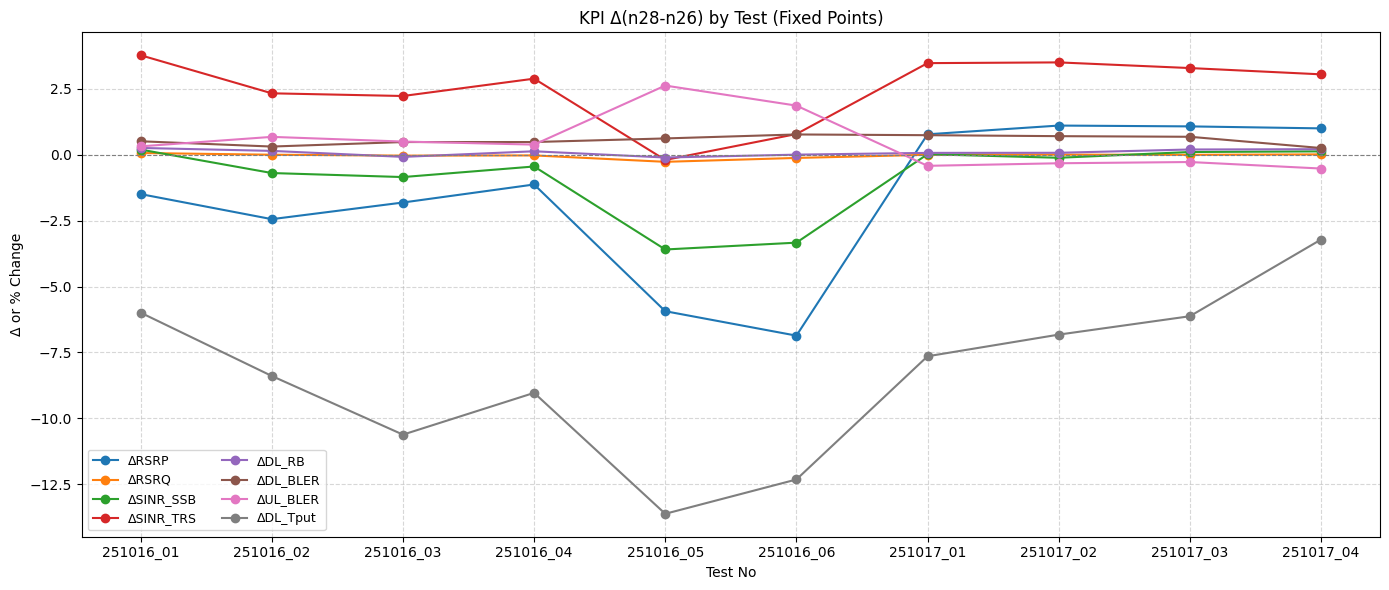

In [5]:
import matplotlib.pyplot as plt

# Δ 또는 % 포함하는 모든 컬럼 자동 선택
plot_cols = [
    "ΔRSRP",
    "ΔRSRQ",
    "ΔSINR_SSB",
    "ΔSINR_TRS",
    "ΔDL_RB",
    "ΔDL_BLER",
    "ΔUL_BLER",
    "ΔDL_Tput",
]

plt.figure(figsize=(14, 6))

for metric in plot_cols:
    plt.plot(df_summary["Test No"], df_summary[metric], marker="o", label=metric)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title(f"KPI Δ(n28-n26) by Test (Fixed Points)")
plt.xlabel("Test No")
plt.ylabel("Δ or % Change")
plt.legend(loc="best", ncol=2, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(data_dir, "KPI_by_test_delta.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
plt.show()

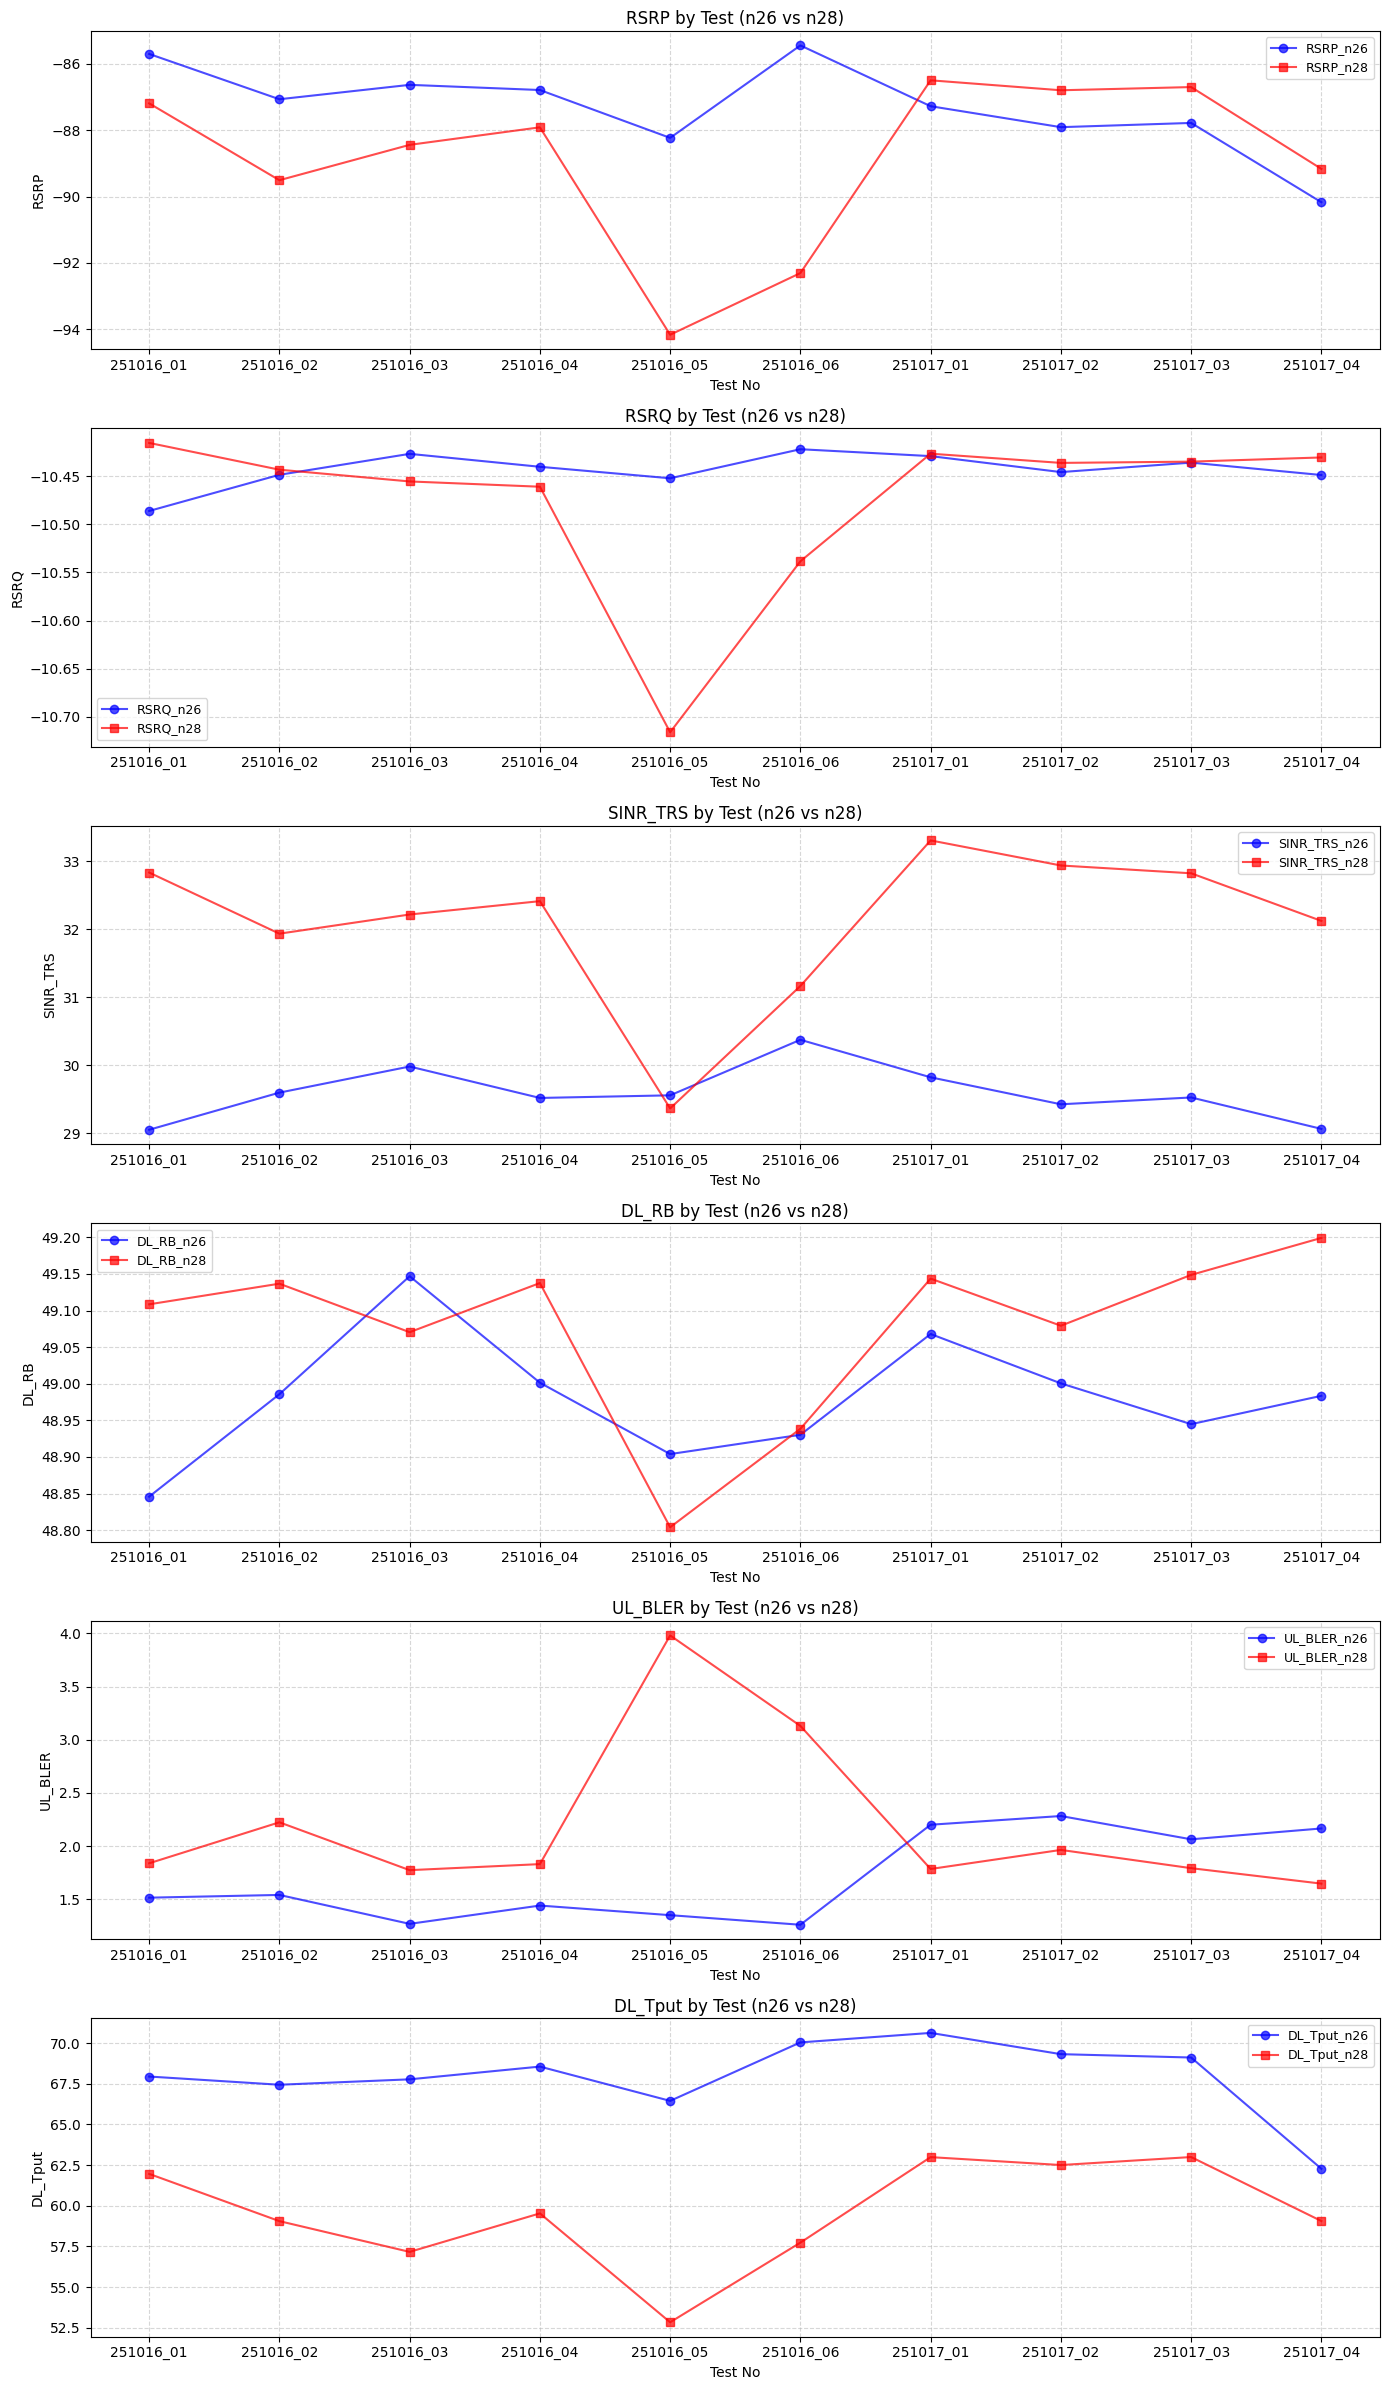

In [6]:
import matplotlib.pyplot as plt
import os

# 비교할 KPI 리스트
metrics = [
    "RSRP",
    "RSRQ",
    # "SINR_SSB",
    "SINR_TRS",
    "DL_RB",
    # "DL_BLER",
    "UL_BLER",
    "DL_Tput",
]

plt.figure(figsize=(14, 4 * len(metrics)))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)

    # Band별 필터링
    df_n26 = df_mean[df_mean["Band"] == "n26"]
    df_n28 = df_mean[df_mean["Band"] == "n28"]

    # --- 그래프 플로팅 ---
    plt.plot(
        df_n26["test_no"],
        df_n26[metric],
        marker="o",
        label=f"{metric}_n26",
        color="blue",
        alpha=0.7,
        linewidth=1.5,
    )
    plt.plot(
        df_n28["test_no"],
        df_n28[metric],
        marker="s",
        label=f"{metric}_n28",
        color="red",
        alpha=0.7,
        linewidth=1.5,
    )

    # --- 그래프 스타일 ---
    plt.title(f"{metric} by Test (n26 vs n28)", fontsize=12, pad=5)
    plt.xlabel("Test No")
    plt.ylabel(metric)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="best", fontsize=9)

plt.tight_layout()
plt.savefig(
    os.path.join(data_dir, "KPI_by_test_cmpr.png"),
    dpi=150,
    bbox_inches="tight",
    pad_inches=0.3,
)
plt.show()

In [7]:
import pandas as pd
import os

df = analyze_kpi(os.path.join(data_dir, f"merged.xlsx"))

exclude_cols = ["TIME", "test_no", "Lon", "Lat", "Band"]
kpi_cols = [
    "RSRP",
    "RSRQ",
    "SINR_SSB",
    "SINR_TRS",
    "DL_MCS",
    "RI",
    "DL_BLER",
    "UL_BLER",
    "DL_RB",
    "DL_Tput",
]

corr_df = pd.DataFrame(index=kpi_cols[:-1])  # DL_Tput 제외, index를 KPI로 설정

for band in ["n26", "n28"]:
    df_band = df[df["Band"] == band][kpi_cols].dropna()

    if df_band.empty:
        continue

    # --- DL_Tput과 다른 KPI 간 상관계수 ---
    corr_with_tput = df_band.corr(method="pearson")["DL_Tput"]
    corr_df[f"corr(DL_Tput, {band} KPIs)"] = corr_with_tput

corr_df = corr_df.round(3)
print(f"Band n26 vs n28 correlation with DL_Tput")
display(corr_df)

Band n26 vs n28 correlation with DL_Tput


,"corr(DL_Tput, n26 KPIs)","corr(DL_Tput, n28 KPIs)"
RSRP,0.954,0.968
RSRQ,0.667,0.456
SINR_SSB,0.969,0.949
SINR_TRS,0.845,0.895
DL_MCS,0.907,0.885
RI,0.641,0.751
DL_BLER,-0.511,-0.283
UL_BLER,-0.477,-0.519
DL_RB,0.101,0.112


In [8]:
import os
import matplotlib.pyplot as plt

df = analyze_kpi(os.path.join(data_dir, f"merged.xlsx"))

test_list = sorted(df["test_no"].unique())

metrics = [
    {"name": "RSRP",     "ylim": (-110, -50)},
    {"name": "RSRQ",     "ylim": (-15, -10)},
    {"name": "SINR_SSB", "ylim": (0, 45)},
    {"name": "SINR_TRS", "ylim": (0, 45)},
    {"name": "UL_BLER",  "ylim": (0, 50)},
    {"name": "DL_RB",    "ylim": (0, 53)},
    {"name": "DL_Tput",  "ylim": (0, 110)},
]

for target_no in test_list:
    df_sub = df[df["test_no"] == target_no]

    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 16), sharex=False)

    for i, m in enumerate(metrics):
        metric = m["name"]
        ymin, ymax = m["ylim"]

        df_pivot = (
            df_sub.pivot_table(index="TIME", columns="Band", values=metric)
                  .dropna()
                  .reset_index()
        )
        df_pivot["idx"] = range(len(df_pivot))
        ax = axes[i]

        # n26 / n28 plot
        ax.plot(df_pivot["idx"], df_pivot["n26"], label="n26", color="blue", linewidth=0.8, alpha=0.7)
        ax.plot(df_pivot["idx"], df_pivot["n28"], label="n28", color="red", linewidth=0.8, alpha=0.7)

        ax.set_ylim(ymin, ymax)
        ax.legend(fontsize=8, loc="upper right")
        ax.set_title(metric, fontsize=11, pad=5)
        ax.set_xlabel("Time Index")
        ax.set_ylabel(metric)
        ax.grid(True, linestyle="--", alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    fig.suptitle(f"[{target_no}] KPI trends over time (n26 vs n28)", fontsize=14, y=0.995)

    os.makedirs(os.path.join(data_dir, "KPI_by_test"), exist_ok=True)
    out_path = os.path.join(data_dir, "KPI_by_test", f"KPI_{target_no}.png")
    plt.savefig(out_path, dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.close(fig)

    print(f"Saved: {out_path}")

Saved: 251017_SM-S938N/KPI_by_test/KPI_251016_01.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251016_02.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251016_03.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251016_04.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251016_05.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251016_06.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251017_01.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251017_02.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251017_03.png
Saved: 251017_SM-S938N/KPI_by_test/KPI_251017_04.png


In [9]:
def grid_kpi(df, grid_size):
        
    lat_factor, lon_factor = 111320, 88000
    
    # # --- ① 기준 offset 설정 (동쪽으로 10m 이동) ---
    # lon_offset_m = 10  # 10m 이동
    # lon_offset_deg = lon_offset_m / lon_factor  # 약 0.0001136도
    
    df_grid = df.copy()
    
    df_grid["lat_bin"] = (df_grid["Lat"] * lat_factor // grid_size).astype(int)
    df_grid["lon_bin"] = (df_grid["Lon"] * lon_factor // grid_size).astype(int)
    # df_grid["lon_bin"] = ((df_grid["Lon"] + lon_offset_deg) * lon_factor // grid_size).astype(int)
    
    df_grid = df_grid.drop(columns=["Lat", "Lon"])

    df_mean = (
        df_grid.groupby(["lat_bin", "lon_bin", "Band"])
          .mean(numeric_only=True)
          .reset_index()
    )
    df_count = (
        df_grid.groupby(["lat_bin", "lon_bin", "Band"])
          .size()
          .reset_index(name="sample_count")
    )
    
    df_grid = pd.merge(df_mean, df_count, on=["lat_bin", "lon_bin", "Band"])
        
    df_grid["loc_id"] = df_grid.groupby(["lat_bin", "lon_bin"]).ngroup()
    df_grid = df_grid[df_grid.groupby("loc_id")["loc_id"].transform("count") == 2]

    cols = ["loc_id", "lat_bin", "lon_bin", "Band"]
    others = [c for c in df_grid.columns if c not in cols]
    df_grid = df_grid[cols+others]

    df_grid = df_grid.reset_index(drop=True)
    # display(df_grid)

    kpi_cols = [
        "RSRP", "RSRQ", 
        "SINR", "SINR_TRS",
        "CQI", "RI", "DL_MCS", 
        "DL_BLER", "UL_BLER", 
        "DL_RB", "DL_Tput", 
        "DL_Tput_per_RB", 
        "DL_Tput_full_RB",
    ]
    
    df_pair = (
        df_grid.pivot(index=["loc_id", "lat_bin", "lon_bin"], columns="Band", values=[*kpi_cols, "sample_count"])
        .reset_index()
    )
    df_pair.columns = [
        f"{col[0]}_{col[1]}" if col[1] != "" else col[0]
        for col in df_pair.columns.to_flat_index()
    ]
    df_pair = df_pair.reset_index(drop=True)
    # display(df_pair)
  
    return df_pair

In [10]:
from branca.colormap import StepColormap
import matplotlib.colors as mcolors
import matplotlib
import math

def make_step_cmap(vmin, vmax):

    base_colors = [
        "#FF0000",  # 1 빨강
        # "#FF4D00",  # 2 밝은 주황
        "#FF8000",  # 3 오렌지
        # "#FFB300",  # 4 연한 오렌지
        "#FFD700",  # 5 노랑
        # "#E6FF33",  # 6 연노랑-연두 사이
        "#ADFF2F",  # 7 연두
        "#008000",  # 6 진한 초록
        # "#7FFF00",  # 8 진연두
        # "#33FF99",  # 9 청록
        "#00FFFF",  # 10 하늘
        # "#33CCFF",  # 11 연하늘
        "#3399FF",  # 12 중간 파랑
        # "#0066FF",  # 13 진파랑
        # "#4B00FF",  # 14 보라파랑
        "#8B00FF",  # 15 보라
        "#CC66FF",  # 16 연보라
        "#FF66CC",  # 17 핑크보라 (마무리)
    ]
    
    extended_colors = []
    for c in base_colors:
        extended_colors.append(c)
    step = (vmax - vmin) / len(extended_colors)
    bins = np.linspace(vmin, vmax, len(extended_colors)+1)

    # # step = round(step, 1) if step < 1 else math.floor(step)
    # if step >= 1:
    #     step = math.floor(step)
    # else:
    #     step = math.floor(step * 10) / 10
    # neg = np.arange(vmin, -step, step)
    # rem = (vmax-vmin) - 2*(len(extended_colors)//2 * step)
    # half_rem = rem/2
    # mid_neg, mid_pos = -half_rem, half_rem
    # pos = np.arange(mid_pos, vmax+step, step)
    # bins = np.concatenate([neg, [mid_neg, mid_pos], pos])
    # bins = np.unique(np.round(bins, 6))
    
    # print("vmin","vmax","step", vmin, vmax, step)
    # # print("bins", bins)
    # print([f"{b:.1f}" for b in bins])
    # print("bins num", len(bins)-1)
    # print("colors num", len(extended_colors))

    cmap = StepColormap(
        colors=extended_colors,
        index=bins,
        vmin=vmin, 
        vmax=vmax,
    )
    cmap.tick_labels = [f"{b:.1f}" for b in bins] # int 강제 변환되는 버그 있음
    for i in range(len(cmap.tick_labels)):
        if i % 2 != 0:
            cmap.tick_labels[i] = ""
            
    return cmap

In [11]:
import re
import numpy as np
import pandas as pd
import folium
import matplotlib
import os

def add_basestation(map_name):
    # 기지국 위치
    site_lat, site_lon = 37.5472288, 126.9815217
    folium.Marker(
        [site_lat, site_lon],
        icon=folium.Icon(color="black", icon="signal"),
        popup="n26/n28 Cell"
    ).add_to(map_name)
    
def render_step_map(lat, lon, values, popup_func, cmap, out_file, caption):
    m = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=zoom_size, tiles="cartodbpositron")

    lat_factor, lon_factor = 111320, 88000
    dlat = grid_size / (2 * lat_factor)
    dlon = grid_size / (2 * lon_factor)
    
    for idx, val in enumerate(values):
        if pd.isna(val):
            continue

        color = cmap(val)
        popup = folium.Popup(popup_func(idx, val), max_width=300)

        lat_c = lat.iloc[idx]
        lon_c = lon.iloc[idx]

        bounds = [
            [lat_c - dlat, lon_c - dlon],  # 남서(SW)
            [lat_c + dlat, lon_c + dlon],  # 북동(NE)
        ]
        folium.Rectangle(
            bounds=bounds,
            weight=0,
            fill=True,
            fill_color=color,
            fill_opacity=0.3,
            popup=popup,
        ).add_to(m)
        
    cmap.caption = caption
    cmap.add_to(m)
    add_basestation(m)
    m.save(out_file)
    print(f"Saved: {out_file} (rows={len(values)})")

def map_kpi(df, grid_size, out_dir):
    
    df_pair = grid_kpi(df, grid_size=grid_size)        
    # display(df_pair)
    
    lat_factor, lon_factor = 111320, 88000
    lat = (df_pair["lat_bin"] + 0.5) * (grid_size / lat_factor)
    lon = (df_pair["lon_bin"] + 0.5) * (grid_size / lon_factor)
    
    metrics_pct = [
        "DL_Tput",
        # "DL_Tput_per_RB",
        # "DL_Tput_full_RB",
    ]

    for metric_pct in metrics_pct:
        n26 = df_pair[f"{metric_pct}_n26"].astype(float)
        n28 = df_pair[f"{metric_pct}_n28"].astype(float)

        ratio = (n28 / n26.replace(0, np.nan)) * 100.0
        ratio = ratio.replace([np.inf, -np.inf], np.nan).dropna()
        ratio_diff = ratio - 100

        vabs = int(np.ceil(np.nanmax(np.abs(ratio_diff))))
        vmin, vmax = -vabs, vabs
        cmap = make_step_cmap(vmin, vmax)

        metrics_detail = [
            "DL_Tput", 
            "DL_RB",
            "RSRP", "SINR", "SINR_TRS", "RSRQ",
            "CQI", "RI",
            "DL_BLER", "UL_BLER",
        ]

        cell_padding = "padding:2px 6px;"
        align_left  = f"text-align:left; {cell_padding}"
        align_right = f"text-align:right; {cell_padding}"
        
        def popup_ratio(idx, val):
            row = df_pair.iloc[idx]
        
            ratio_color = (
                "color:#0070C0;" if val > 0 else
                "color:#C00000;" if val < 0 else
                "color:#000000;"
            )
            ratio_header = f"""
            <div style="text-align:left; font-size:12px; margin-bottom:6px;">
                {metric_pct} Δ(n28/n26-100%) : <span style="{ratio_color}">{val:+.1f} %</span>
            </div>
            """
        
            table_html = f"""
            <table style="border-collapse:collapse; font-size:12px;">
            <tr style="background-color:#cfd8dc;">
                <th style="{align_left}">Metric</th>
                <th style="{align_right}">n26</th>
                <th style="{align_right}">n28</th>
                <th style="{align_right}">Δ<span style='font-size:8px;'>(n28−n26)</span></th>
            </tr>
            <tr style="background-color:#f2f2f2;">
                <td style="{align_left}">Samples</td>
                <td style="{align_right}">{int(row.get("sample_count_n26", 0))}</td>
                <td style="{align_right}">{int(row.get("sample_count_n28", 0))}</td>
                <td style="{align_right}"></td>
            </tr>
            """.format(
                count26=int(row.get("sample_count_n26", 0)),
                count28=int(row.get("sample_count_n28", 0)),
            )
        
            # KPI 행 반복
            for metric in metrics_detail:
                c26, c28 = f"{metric}_n26", f"{metric}_n28"
                if c26 not in df_pair.columns or c28 not in df_pair.columns:
                    continue
        
                v26, v28 = row[c26], row[c28]
                if pd.isna(v26) or pd.isna(v28):
                    continue
        
                diff = v28 - v26
                if diff > 0:
                    diff_color = "color:#0070C0;"   # 파랑
                elif diff < 0:
                    diff_color = "color:#C00000;"   # 빨강
                else:
                    diff_color = "color:#000000;"   # 검정
                
                highlight = 'background-color:#f2f2f2;' if metric == metric_pct else ''
                table_html += f"""
                <tr style="{highlight}">
                    <td style="{align_left}">{metric}</td>
                    <td style="{align_right}">{v26:.1f}</td>
                    <td style="{align_right}">{v28:.1f}</td>
                    <td style="{align_right} {diff_color}">{diff:+.1f}</td>
                </tr>
                """
        
            table_html += "</table>"
        
            return ratio_header + table_html

        out_file = os.path.join(data_dir, f"{metric_pct}_{grid_size}m.html")
        caption = f"{metric_pct} Δ(n28/n26-100%)"
        render_step_map(
            lat,
            lon,
            ratio_diff,
            popup_ratio,
            cmap,
            out_file,
            caption
        )

In [12]:
grid_list = [25, 50, 75, 100]
for grid_size in grid_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged.xlsx"))
    map_kpi(df, grid_size=grid_size, out_dir=data_dir)

Saved: 251017_SM-S938N/DL_Tput_25m.html (rows=66)
Saved: 251017_SM-S938N/DL_Tput_50m.html (rows=33)
Saved: 251017_SM-S938N/DL_Tput_75m.html (rows=21)
Saved: 251017_SM-S938N/DL_Tput_100m.html (rows=13)


In [13]:
import os
import numpy as np
import pandas as pd
import folium
import matplotlib
from branca.colormap import StepColormap

zoom_up = zoom_size+1

def add_basestation(map_name):
    # 기지국 위치
    site_lat, site_lon = 37.5472288, 126.9815217
    folium.Marker(
        [site_lat, site_lon],
        icon=folium.Icon(color="black", icon="signal"),
        popup="후암동 415-1"
    ).add_to(map_name)
    
def map_coverage(df, grid_size, out_dir):
    grid_dir = os.path.join(out_dir, f"{grid_size}m_map")
    os.makedirs(grid_dir, exist_ok=True)
    temp_dir = os.path.join(grid_dir, "temp")
    os.makedirs(temp_dir, exist_ok=True)
    
    df_pair = grid_kpi(df, grid_size=grid_size)

    lat_factor, lon_factor = 111320, 88000
    lat = (df_pair["lat_bin"] + 0.5) * (grid_size / lat_factor)
    lon = (df_pair["lon_bin"] + 0.5) * (grid_size / lon_factor)

    metrics = [
        "RSRP",
        "RSRQ",
        "SINR",
        "SINR_TRS",
        "CQI",
        "DL_RB",
        "DL_Tput",
        # "DL_Tput_full_RB",
    ]
    
    for metric in metrics:
        # print(metric)
        n26_val = df_pair[f"{metric}_n26"].astype(float)
        n28_val = df_pair[f"{metric}_n28"].astype(float)

        vmin = np.floor(min(n26_val.min(),n28_val.min()))
        vmax = np.ceil(max(n26_val.max(),n28_val.max()))
        cmap = make_step_cmap(vmin, vmax) 


        if metric in ["RSRQ", "SINR"]:
            caption = f"{metric} (dB)"
        elif metric in ["RSRP"]:
            caption = f"{metric} (dBm)"
        elif metric in ["DL_Tput_full_RB"]:
            caption = f"{metric} (Mbps)"
        else:
            caption = metric

        lat_factor, lon_factor = 111320, 88000
        dlat = grid_size / (2 * lat_factor)
        dlon = grid_size / (2 * lon_factor)
        
        # -------------------
        # n26 지도
        # -------------------
        m1 = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=zoom_up, tiles="cartodbpositron")
        for idx in range(len(df_pair)):
            if pd.isna(n26_val.iloc[idx]):
                continue
            color26 = cmap(n26_val.iloc[idx])
            
            lat_c, lon_c = lat.iloc[idx], lon.iloc[idx]
            bounds = [
                [lat_c - dlat, lon_c - dlon],  # 남서(SW)
                [lat_c + dlat, lon_c + dlon],  # 북동(NE)
            ]

            popup = folium.Popup(
                f"<b>n26 {metric}</b><br>"
                f"Average: {n26_val.iloc[idx]:.1f}<br>"
                f"Samples: {int(df_pair.loc[idx, 'sample_count_n26'])}",
                max_width=300
            )
            
            folium.Rectangle(
                bounds=bounds,
                weight=0,
                fill=True,
                fill_color=color26,
                fill_opacity=0.5,
                popup=popup,
            ).add_to(m1)
        
        cmap.add_to(m1)
        add_basestation(m1)
        n26_file = os.path.join(temp_dir, f"{metric}_n26.html")
        m1.save(n26_file)

        # -------------------
        # n28 지도
        # -------------------
        m2 = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=zoom_up, tiles="cartodbpositron")
        for idx in range(len(df_pair)):
            if pd.isna(n28_val.iloc[idx]):
                continue
            color28 = cmap(n28_val.iloc[idx])
            
            lat_c, lon_c = lat.iloc[idx], lon.iloc[idx]
            bounds = [
                [lat_c - dlat, lon_c - dlon],  # 남서(SW)
                [lat_c + dlat, lon_c + dlon],  # 북동(NE)
            ]     

            popup = folium.Popup(
                f"<b>n28 {metric}</b><br>"
                f"Average: {n28_val.iloc[idx]:.1f}<br>"
                f"Samples: {int(df_pair.loc[idx, 'sample_count_n28'])}",
                max_width=300
            )
            
            folium.Rectangle(
                bounds=bounds,
                weight=0,
                fill=True,
                fill_color=color28,
                fill_opacity=0.5,
                popup=popup,
            ).add_to(m2)
            
        cmap.add_to(m2)
        add_basestation(m2)        
        n28_file = os.path.join(temp_dir, f"{metric}_n28.html")
        m2.save(n28_file)

        # -------------------
        # 합쳐서 비교 HTML 만들기
        # -------------------
        html_code = f"""
        <html>
        <head><title>{metric} Coverage Compare</title>
        <style>
        .container {{
            display: flex;
            flex-direction: row;
            justify-content: space-between;
            align-items: flex-start;
        }}
        .map-box {{
            width: 49%;
            text-align: center;
        }}
        iframe {{
            width: 100%;
            height: 800px;
            border: none;
        }}
        h2 {{
            margin-bottom: 10px;
        }}
        h4 {{
            margin-top: 10px;
            margin-bottom: 10px;
        }}
        </style>
        </head>
        <body>
        <h2 style="text-align:center;">{metric} Coverage</h2>
        <div class="container">
            <div class="map-box">
                <h4>n26 (800MHz)</h4>
                <iframe src="temp/{os.path.basename(n26_file)}"></iframe>
            </div>
            <div class="map-box">
                <h4>n28 (700MHz)</h4>
                <iframe src="temp/{os.path.basename(n28_file)}"></iframe>
            </div>
        </div>
        </body>
        </html>
        """

        out_file = os.path.join(grid_dir, f"cmpr_{metric}.html")
        with open(out_file, "w", encoding="utf-8") as f:
            f.write(html_code)

        print(f"Saved: {n26_file}")
        print(f"Saved: {n28_file}")
        print(f"Saved: {out_file}")

In [14]:
grid_list = [25]
for grid_size in grid_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged.xlsx"))
    map_coverage(df, grid_size=grid_size, out_dir=data_dir)

Saved: 251017_SM-S938N/25m_map/temp/RSRP_n26.html
Saved: 251017_SM-S938N/25m_map/temp/RSRP_n28.html
Saved: 251017_SM-S938N/25m_map/cmpr_RSRP.html
Saved: 251017_SM-S938N/25m_map/temp/RSRQ_n26.html
Saved: 251017_SM-S938N/25m_map/temp/RSRQ_n28.html
Saved: 251017_SM-S938N/25m_map/cmpr_RSRQ.html
Saved: 251017_SM-S938N/25m_map/temp/SINR_n26.html
Saved: 251017_SM-S938N/25m_map/temp/SINR_n28.html
Saved: 251017_SM-S938N/25m_map/cmpr_SINR.html
Saved: 251017_SM-S938N/25m_map/temp/SINR_TRS_n26.html
Saved: 251017_SM-S938N/25m_map/temp/SINR_TRS_n28.html
Saved: 251017_SM-S938N/25m_map/cmpr_SINR_TRS.html
Saved: 251017_SM-S938N/25m_map/temp/CQI_n26.html
Saved: 251017_SM-S938N/25m_map/temp/CQI_n28.html
Saved: 251017_SM-S938N/25m_map/cmpr_CQI.html
Saved: 251017_SM-S938N/25m_map/temp/DL_RB_n26.html
Saved: 251017_SM-S938N/25m_map/temp/DL_RB_n28.html
Saved: 251017_SM-S938N/25m_map/cmpr_DL_RB.html
Saved: 251017_SM-S938N/25m_map/temp/DL_Tput_n26.html
Saved: 251017_SM-S938N/25m_map/temp/DL_Tput_n28.html
Saved:

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

def plot_kpi(df, grid_size, out_dir):
    os.makedirs(out_dir, exist_ok = True)
    plot_dir = os.path.join(out_dir, f"{grid_size}m_plot")
    os.makedirs(plot_dir, exist_ok=True)
    
    df_pair = grid_kpi(df, grid_size=grid_size)

    rsrp_col = "RSRP_n28"
    rsrp_min = int(df_pair[rsrp_col].min())
    rsrp_max = int(df_pair[rsrp_col].max())
    bins = np.arange(rsrp_min, rsrp_max + 2, 1)  # 1 dB step
    df_pair["RSRP_bin"] = pd.cut(df_pair["RSRP_n28"], bins=bins, right=False)
    
    df_binned = (
        df_pair.groupby("RSRP_bin", observed=True)
        .mean(numeric_only=True)
        .reset_index()
    )
    df_binned["RSRP_bin_tick"] = df_binned["RSRP_bin"].apply(lambda x: int(x.left))
    
    style_map = {
        "n26": {"marker": "o", "color": "blue"},
        "n28": {"marker": "s", "color": "red"},
    }
    
    # 공통 x축 설정 함수
    def apply_common_axis(ax, df, xlabel, ylabel):
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.invert_xaxis()
        ax.grid(True, linestyle="--", alpha=0.7)
    
        # min/max를 5dB 단위로 맞추기
        x_min = int(df["RSRP_bin_tick"].min())
        x_max = int(df["RSRP_bin_tick"].max())
        x_min_5 = (x_min // 5) * 5
        x_max_5 = (x_max // 5) * 5
    
        xticks = np.arange(x_min_5, x_max_5 + 1, 5)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, rotation=45)
    
    
    # Rx Quality (Absolute + Difference)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    plt.subplots_adjust(wspace=0.2, hspace=0.32)
    
    # Absoulte
    metrics_group1 = [("RSRP", "RSRP [dBm]"),
                      ("RSRQ", "RSRQ [dB]"),
                      ("SINR", "SINR [dB]")]
    
    for ax, (metric, ylabel) in zip(axes[0], metrics_group1):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
                style = style_map[source]
                ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
                        marker=style["marker"], markersize=3,
                        color=style["color"], label=source,
                        linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    # n28 - n26 Difference
    metrics_group_diff = [
        ("RSRP", "RSRP Δ [dB]"),
        ("RSRQ", "RSRQ Δ [dB]"),
        ("SINR", "SINR Δ [dB]")
    ]
    
    for ax, (metric, ylabel) in zip(axes[1], metrics_group_diff):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            diff = df_binned[col_n28] - df_binned[col_n26]
            ax.plot(df_binned["RSRP_bin_tick"], diff,
                    marker="^", markersize=3,
                    color="green", label=f"{metric} (n28-n26)",
                    linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
            ax.set_ylim(-20, 20)
            ax.axhline(0, color="black", linestyle="--", linewidth=1)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    fig.suptitle("Rx Quality (RSRP, RSRQ, SINR)", fontsize=14, y = 0.95)
    plt.savefig(os.path.join(plot_dir, f"plot_rx_quality.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close(fig)
    
    
    # Link Adaptation (CQI, MCS, RI)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    plt.subplots_adjust(wspace=0.2, hspace=0.32)

    metrics_abs = [
        ("RI", "RI"),
        ("CQI", "CQI"),
        ("DL_MCS", "DL MCS"),
    ]
    metrics_diff = [
        ("RI", "RI Δ"),
        ("CQI", "CQI Δ"),
        ("DL_MCS", "DL MCS Δ"),
    ]
    
    # Absolute
    for ax, (metric, ylabel) in zip(axes[0], metrics_abs):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
                style = style_map[source]
                ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
                        marker=style["marker"], markersize=3,
                        color=style["color"], label=source,
                        linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    # delta Δ
    for ax, (metric, ylabel) in zip(axes[1], metrics_diff):
        col_n26 = f"{metric}_n26"
        col_n28 = f"{metric}_n28"
        if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
            diff = df_binned[col_n28] - df_binned[col_n26]
            ax.plot(df_binned["RSRP_bin_tick"], diff,
                    marker="^", markersize=3,
                    color="green", label=f"{metric} (n28−n26)",
                    linestyle="-", linewidth=1)
            apply_common_axis(ax, df_binned, "RSRP [dBm]", ylabel)
    
            if metric == "CQI":
                ax.set_ylim(-10, 10)
            elif metric == "DL_MCS":
                ax.set_ylim(-20, 20)
            elif metric == "RI":
                ax.set_ylim(-1, 1)
            ax.axhline(0, color="black", linestyle="--", linewidth=1)
            ax.legend()
            ax.set_title(ylabel, fontsize=12, pad = 8)
    
    fig.suptitle("Link Adaptation (RI, CQI, DL MCS)", fontsize=14, y=0.95)
    plt.savefig(os.path.join(plot_dir, f"plot_link_adaptation.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close(fig)
    
    # Throughput
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))
    plt.subplots_adjust(wspace=0.25)

    metric = "DL_Tput"
    col_n26 = f"{metric}_n26"
    col_n28 = f"{metric}_n28"
    
    # Absolute Throughput
    ax = axes[0]
    for source, col in zip(["n26", "n28"], [col_n26, col_n28]):
        style = style_map[source]
        ax.plot(df_binned["RSRP_bin_tick"], df_binned[col],
                marker=style["marker"], markersize=3,
                color=style["color"], label=source,
                linestyle="-", linewidth=1)
    apply_common_axis(ax, df_binned, "RSRP [dBm]", "DL Tput [Mbps]")
    ax.legend()
    # ax.set_title("Absolute DL Tput", fontsize=10, pad=7)
    
    # Relative Throughput
    ax = axes[1]
    if col_n26 in df_binned.columns and col_n28 in df_binned.columns:
        rel_ratio = (df_binned[col_n28] / df_binned[col_n26]) * 100
        ax.plot(df_binned["RSRP_bin_tick"], rel_ratio,
                marker="s", markersize=3, color="green", label="n28/n26 [%]",
                linestyle="-", linewidth=1)
    apply_common_axis(ax, df_binned, "RSRP [dBm]", "DL Tput Ratio [%]")
    ax.legend()
    # ax.set_title("Relative DL Tput", fontsize=10, pad=7)
    
    fig.suptitle("DL Throughput", fontsize=14, y=0.98)
    
    plt.savefig(os.path.join(plot_dir, f"plot_{metric}.png"), dpi=150, bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close(fig)

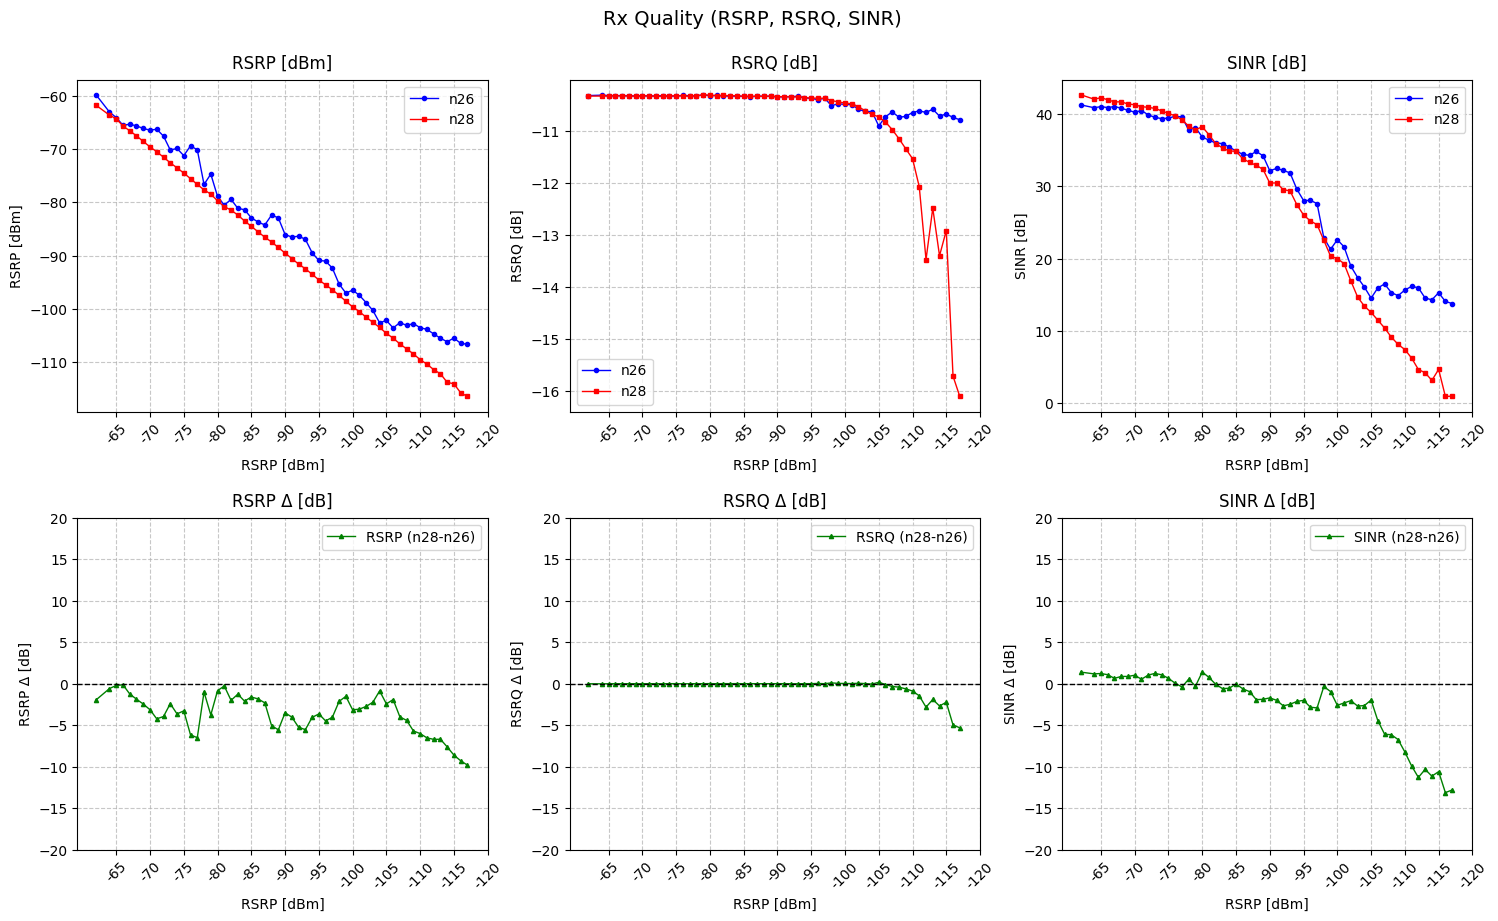

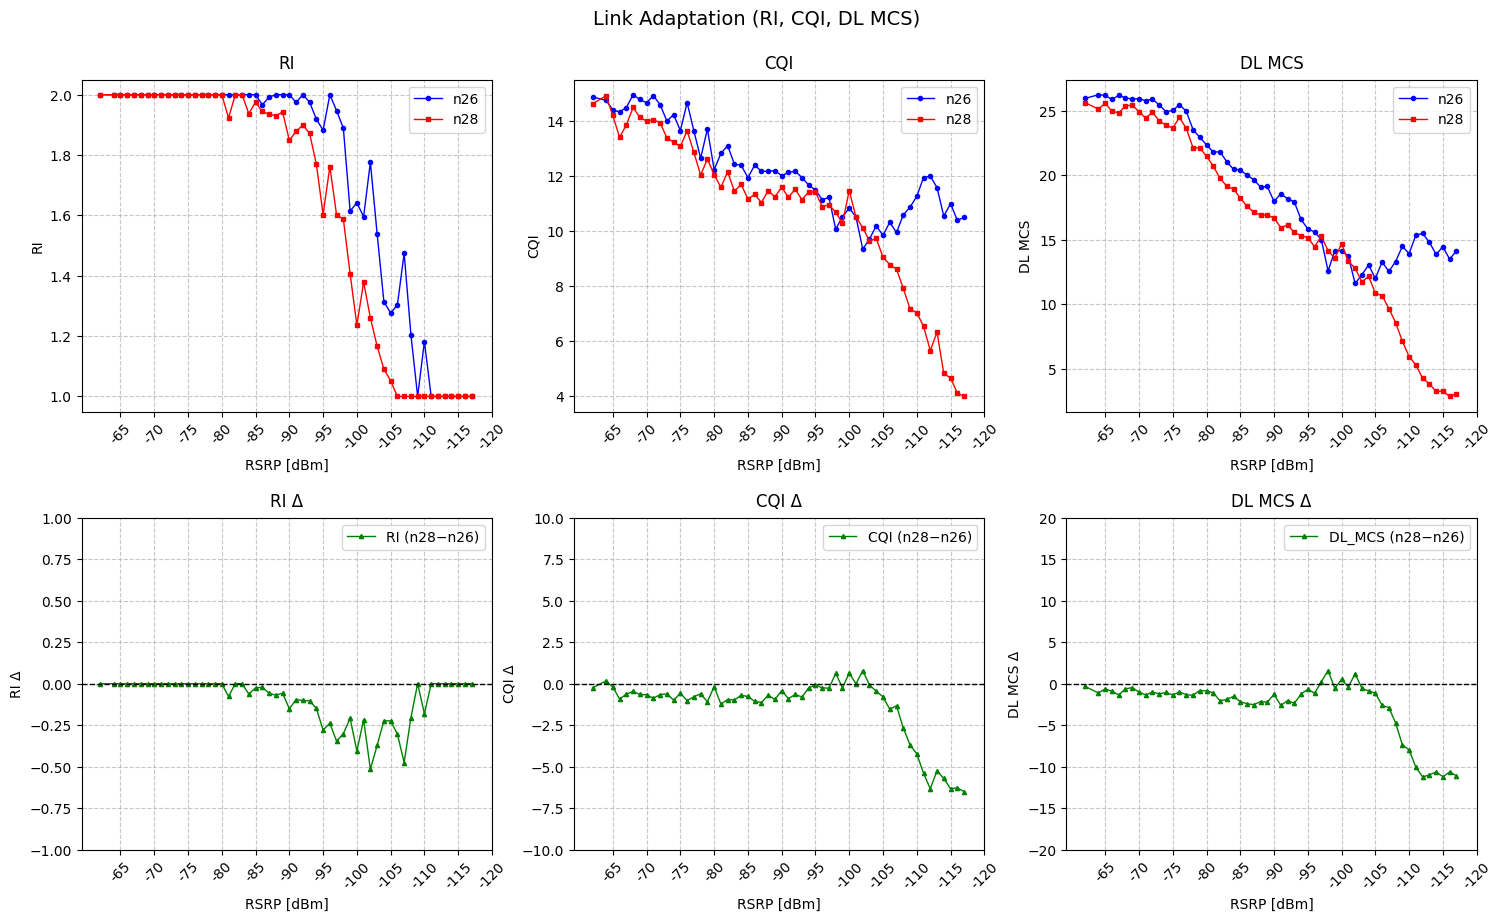

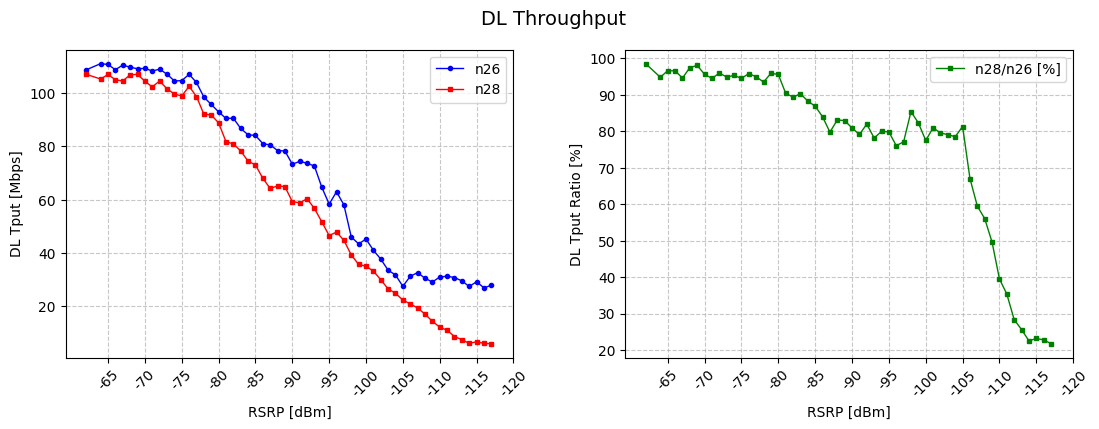

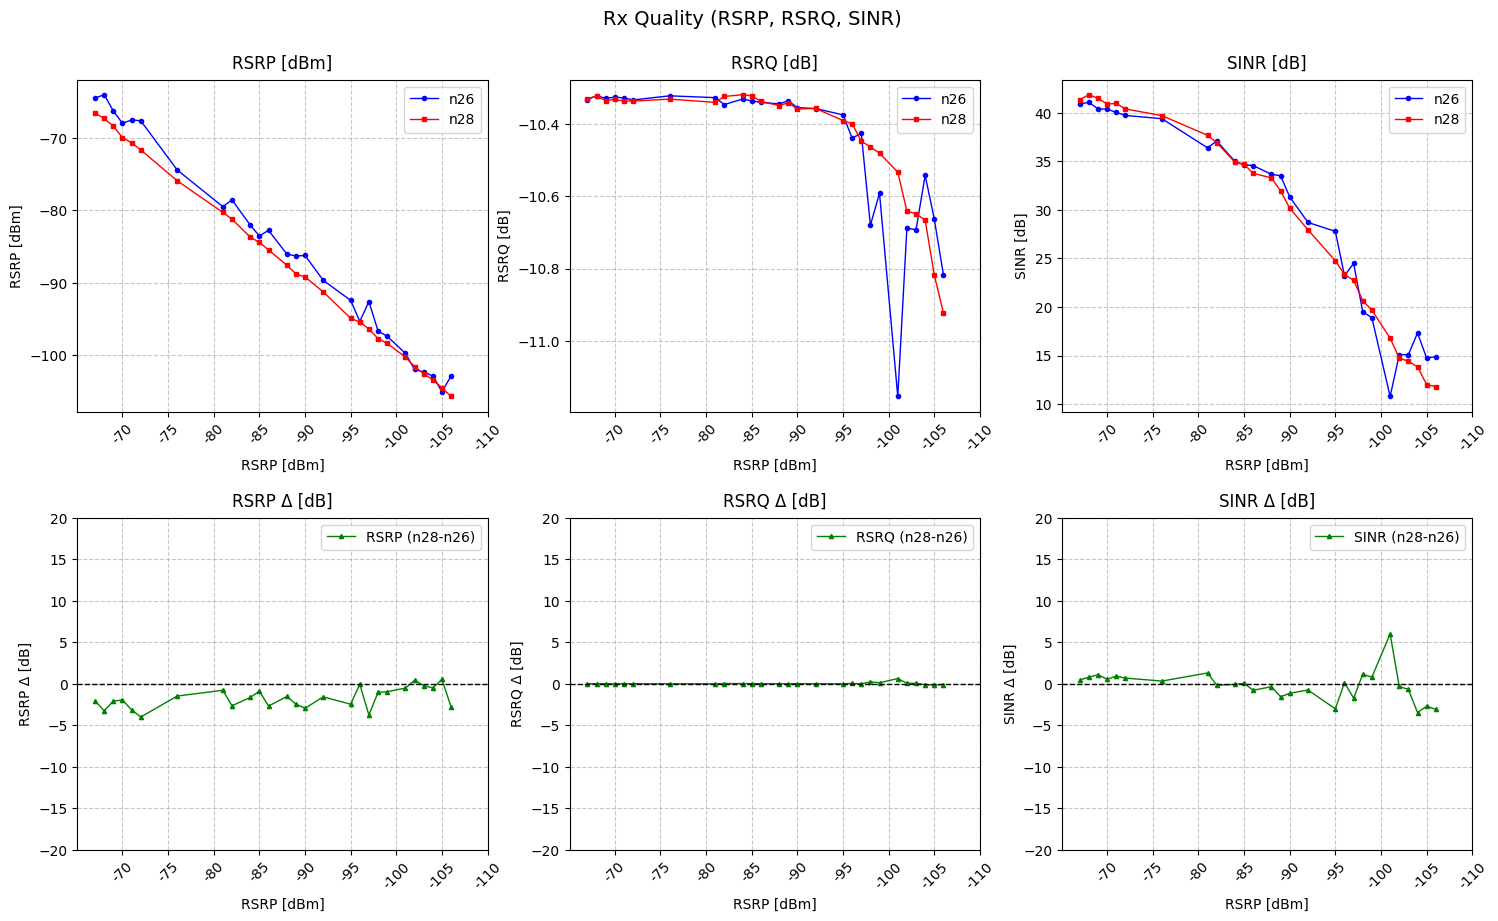

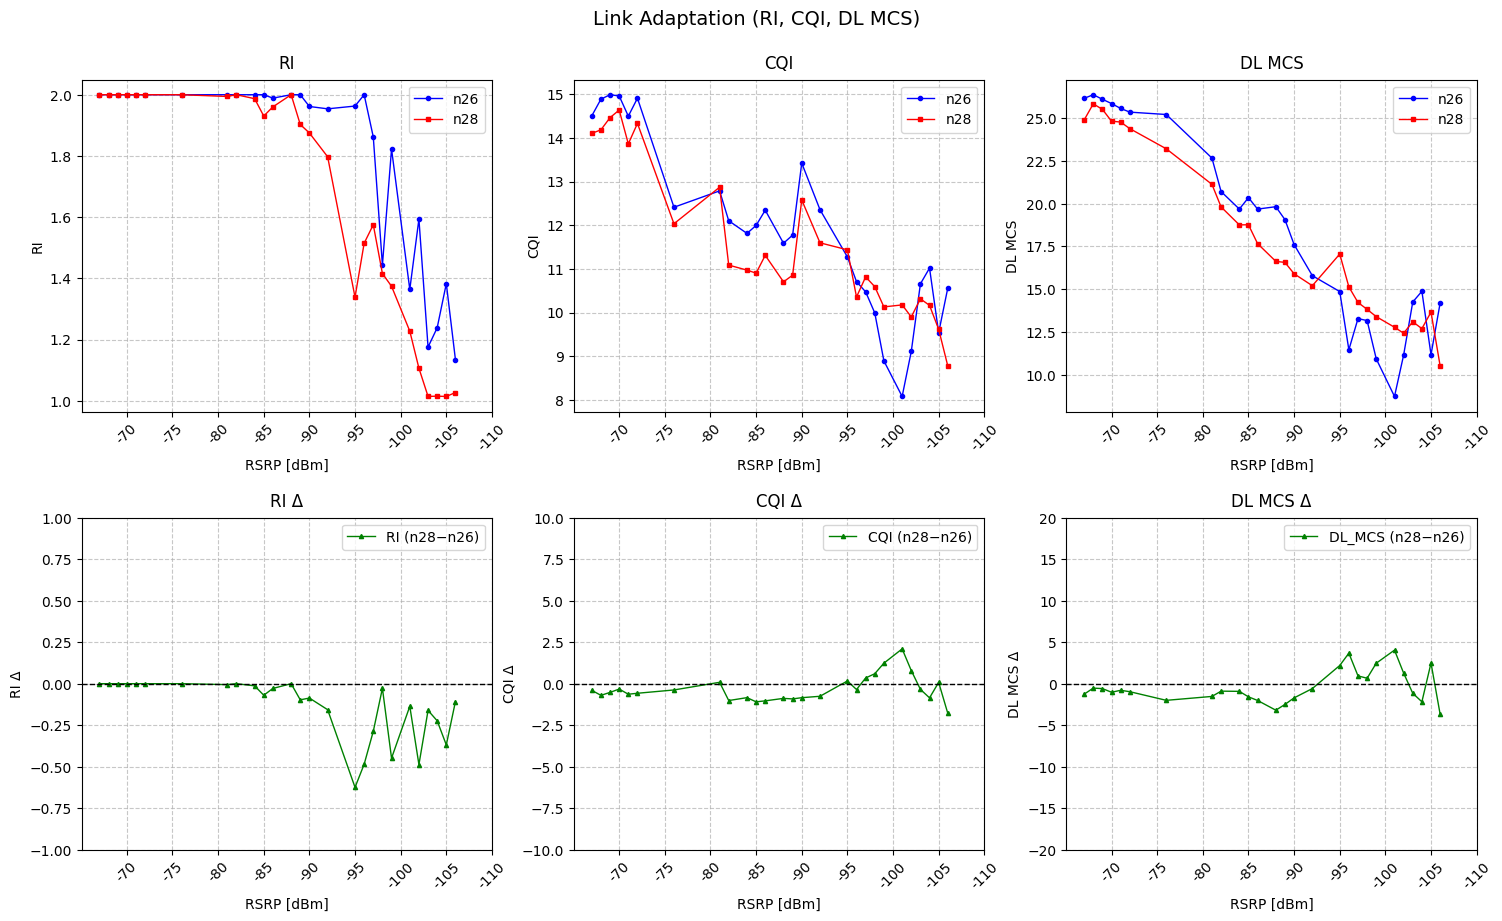

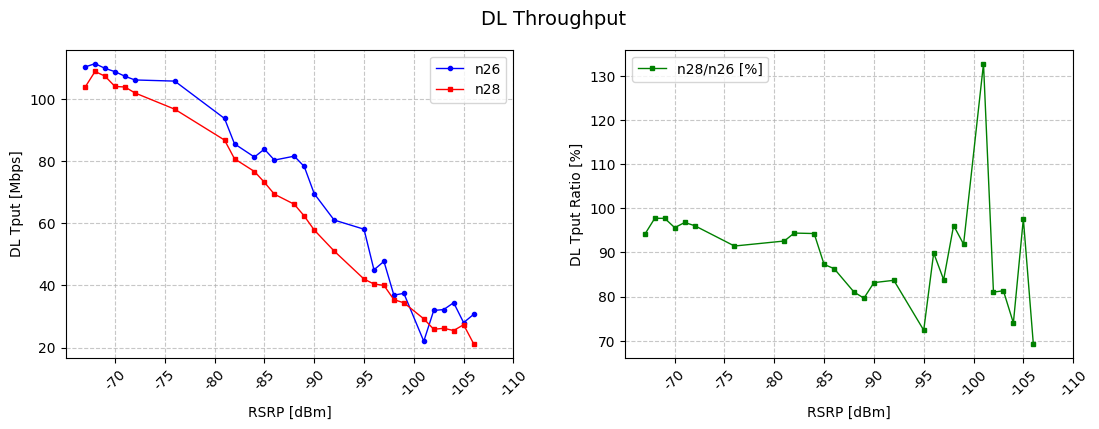

In [16]:
grid_list = [1, 25]
for grid_size in grid_list:
    df = analyze_kpi(os.path.join(data_dir, f"merged.xlsx"))
    plot_kpi(df, grid_size=grid_size, out_dir=data_dir)